In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Conecatenating All File Without Anyformat with Convert to .csv Format in One Folder and the filename become into 'Datetime' column also split the datetime that including time to time seconds column inside one dataset

First Dataset

In [ ]:
import pandas as pd
import os
import re
import numpy as np

def calculate_features(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

def extract_datetime(filename):
    # Use regular expression to extract datetime substring
    match = re.search(r"(\d{4}\.\d{2}\.\d{2}\.\d{2}\.\d{2}\.\d{2})", filename)
    if match:
        datetime_str = match.group(1)  # Extract datetime substring
        datetime = pd.to_datetime(datetime_str, format='%Y.%m.%d.%H.%M.%S')
        time_seconds = datetime.hour * 3600 + datetime.minute * 60 + datetime.second
        return datetime, time_seconds
    else:
        return None, None

def convert_multiple_folders_to_csv(root_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # List to store converted DataFrames
    converted_dfs = []

    # Define columns explicitly
    columns = ['B1X_p2p', 'B1Y_p2p', 'B1X_skew', 'B1Y_skew', 'B1X_crest', 'B1Y_crest', 'B1X_kurtosis', 'B1Y_kurtosis']

    # Iterate over directories in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        print(f"Processing directory: {dirpath}")
        for filename in filenames:
            print(f"Found file: {filename}")

            # Read the dataset into a DataFrame
            df = pd.read_csv(os.path.join(dirpath, filename), sep="\t")

            # Extract features from the dataset
            features = calculate_features(df)  # You need to define calculate_features() function

            # Create a DataFrame with the extracted features
            features_df = pd.DataFrame([features], columns=columns)

            # Extract datetime from filename
            datetime, time_seconds = extract_datetime(filename)

            # Add datetime column to features_df
            features_df['Datetime'] = datetime

            # Add time_seconds column to features_df
            features_df['Time_seconds'] = time_seconds

            # Define the output path for the CSV file
            output_filename = os.path.join(output_folder, os.path.relpath(dirpath, root_folder), os.path.splitext(filename)[0] + '_converted.csv')

            # Ensure the directory structure exists in the output folder
            os.makedirs(os.path.dirname(output_filename), exist_ok=True)

            # Save the DataFrame as a CSV file
            features_df.to_csv(output_filename, index=False)

            print(f"Converted {os.path.join(dirpath, filename)} to CSV: {output_filename}")

            # Append the converted DataFrame to the list
            converted_dfs.append(features_df)

    return converted_dfs if converted_dfs else None  # Return None if no files found

# Example usage
root_folder = "/content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/1st_test/1st_test/dataset"
output_folder = "/content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset"
converted_datasets = convert_multiple_folders_to_csv(root_folder, output_folder)

# Check if converted_datasets is not None before concatenating and saving
if converted_datasets:
    # Concatenate the DataFrames into one DataFrame
    concatenated_df_1st_test = pd.concat(converted_datasets, ignore_index=True)

    # Define the output path for the concatenated CSV file
    concatenated_output_filename = os.path.join(output_folder, "concatenated_dataset.csv")

    # Save the concatenated DataFrame to a CSV file
    concatenated_df_1st_test.to_csv(concatenated_output_filename, index=False)

    print(f"Concatenated dataset saved to: {concatenated_output_filename}")
else:
    print("No files found in the specified folders.")


Processing directory: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/1st_test/1st_test/dataset
Found file: 2003.11.22.23.16.56
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/1st_test/1st_test/dataset/2003.11.22.23.16.56 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2003.11.22.23.16_converted.csv
Found file: 2003.11.22.23.36.56
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/1st_test/1st_test/dataset/2003.11.22.23.36.56 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2003.11.22.23.36_converted.csv
Found file: 2003.11.22.23.26.56
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/1st_test/1st_test/dataset/2003.11.22.23.26.56 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2003.11.22.23.26_converted.csv
Found file: 2003.11.22.23.46.56
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data

In [ ]:
concatenated_df_1st_test

,B1X_p2p,B1Y_p2p,B1X_skew,B1Y_skew,B1X_crest,B1Y_crest,B1X_kurtosis,B1Y_kurtosis,Datetime,Time_seconds
0,0.154765,0.148371,0.153090,0.141916,0.165430,0.168247,0.186149,0.179832,2003-11-22 23:16:56,83816
1,0.154178,0.148745,0.153291,0.140957,0.169153,0.170183,0.182334,0.180000,2003-11-22 23:36:56,85016
2,0.154798,0.149150,0.153269,0.142565,0.166563,0.168507,0.172495,0.180273,2003-11-22 23:26:56,84416
3,0.154753,0.147927,0.153789,0.141652,0.165234,0.170177,0.180176,0.180040,2003-11-22 23:46:56,85616
4,0.155969,0.149597,0.153720,0.141213,0.165133,0.167482,0.167821,0.176354,2003-11-22 23:14:58,83698
...,...,...,...,...,...,...,...,...,...,...
95,0.155290,0.149527,0.154305,0.142861,0.169355,0.173042,0.185684,0.181059,2003-11-23 14:16:56,51416
96,0.156651,0.148296,0.153301,0.142560,0.164594,0.171587,0.183384,0.180135,2003-11-23 14:46:56,53216
97,0.154602,0.148636,0.153277,0.141036,0.165637,0.170036,0.179070,0.177768,2003-11-23 14:56:56,53816
98,0.155607,0.147889,0.152805,0.142464,0.167600,0.171697,0.183421,0.177559,2003-11-23 12:56:56,46616


In [ ]:
concatenated_df_1st_test.drop(['B1X_crest','B1Y_crest','B1X_kurtosis','B1Y_kurtosis'],axis=1, inplace=True)

In [ ]:
concatenated_df_1st_test

,B1X_p2p,B1Y_p2p,B1X_skew,B1Y_skew,Datetime,Time_seconds
0,0.154765,0.148371,0.153090,0.141916,2003-11-22 23:16:56,83816
1,0.154178,0.148745,0.153291,0.140957,2003-11-22 23:36:56,85016
2,0.154798,0.149150,0.153269,0.142565,2003-11-22 23:26:56,84416
3,0.154753,0.147927,0.153789,0.141652,2003-11-22 23:46:56,85616
4,0.155969,0.149597,0.153720,0.141213,2003-11-22 23:14:58,83698
...,...,...,...,...,...,...
95,0.155290,0.149527,0.154305,0.142861,2003-11-23 14:16:56,51416
96,0.156651,0.148296,0.153301,0.142560,2003-11-23 14:46:56,53216
97,0.154602,0.148636,0.153277,0.141036,2003-11-23 14:56:56,53816
98,0.155607,0.147889,0.152805,0.142464,2003-11-23 12:56:56,46616


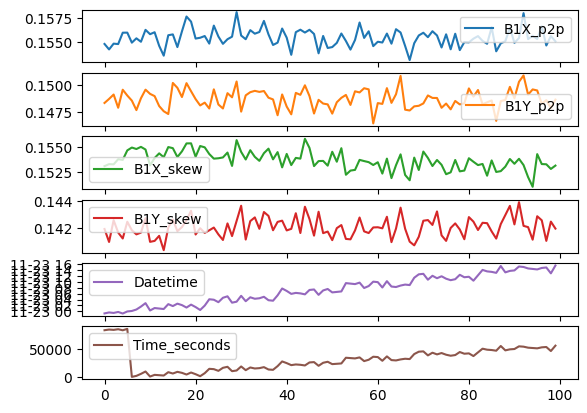

In [ ]:
import matplotlib.pyplot as plt
concatenated_df_1st_test.plot(subplots=True)  # Creates subplots for each column
plt.show()

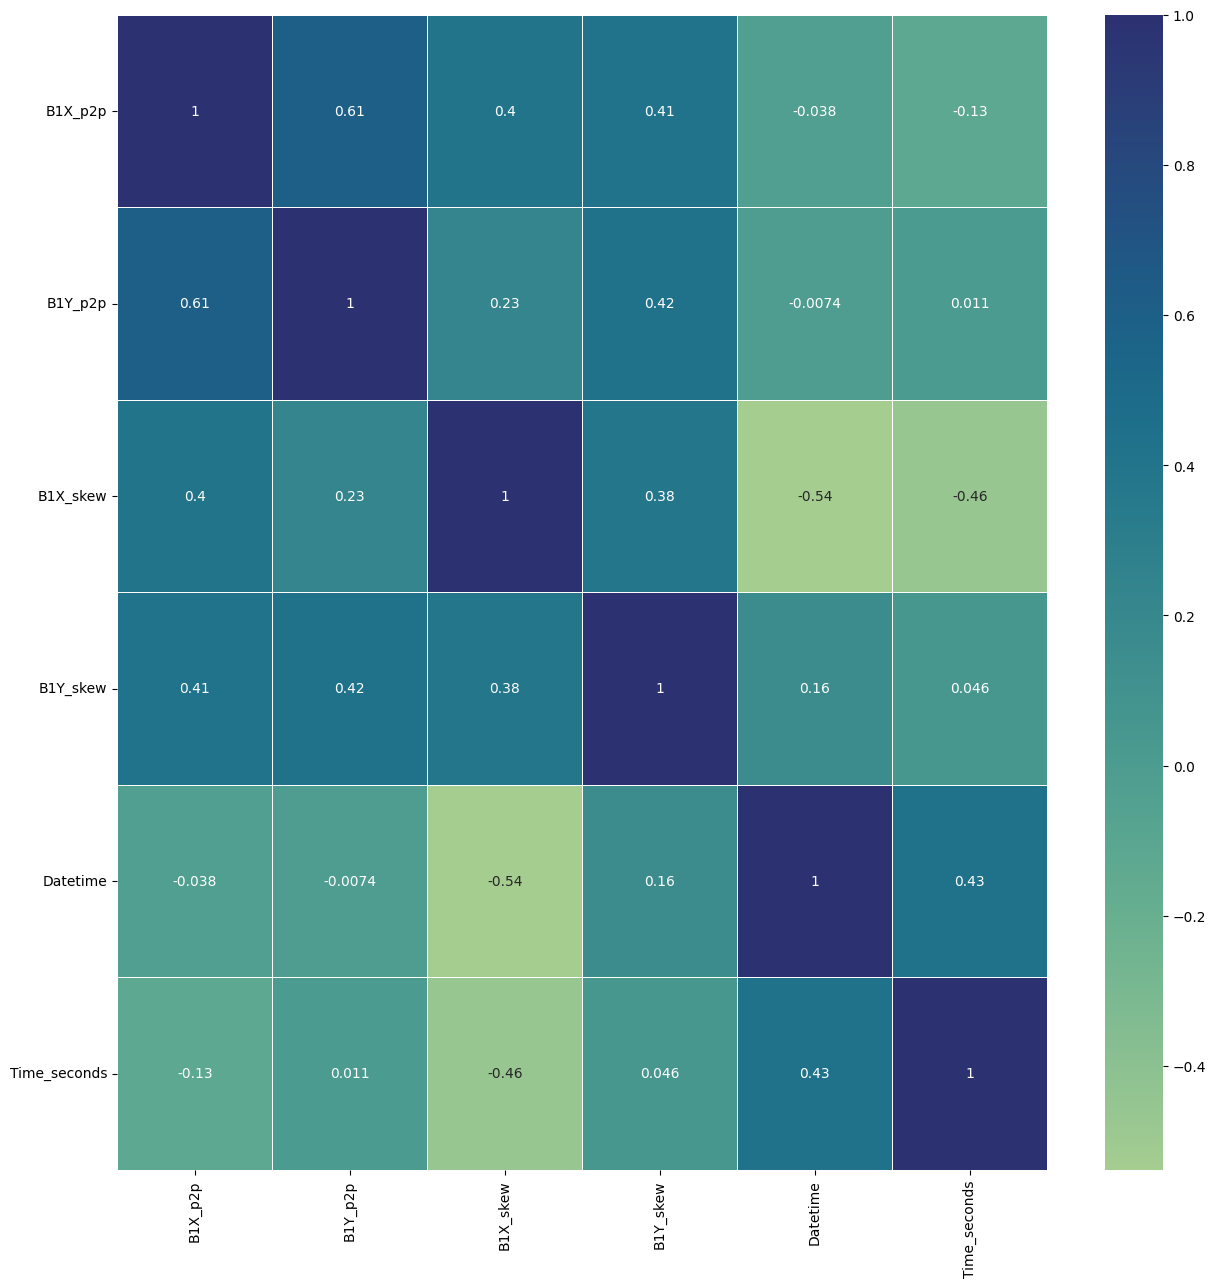

In [ ]:
import seaborn as sns
sns.heatmap(concatenated_df_1st_test.corr(),annot=True,cmap="crest",linewidths=.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming concatenated_df_1st_test is already loaded with data
# Separate the numeric columns
numeric_cols = concatenated_df_1st_test.select_dtypes(include=[np.number]).columns
numeric_data = concatenated_df_1st_test[numeric_cols]

# Standardize the numeric data
scaler = StandardScaler()
X_1st_test = scaler.fit_transform(numeric_data)

# Perform PCA
pca_1st_test = PCA(n_components=1)
X_pca_1st_test = pca_1st_test.fit_transform(X_1st_test)

# Create a DataFrame for the principal component
principalDf_1st_test = pd.DataFrame(data=X_pca_1st_test, columns=['principal component 1'])

# If you need to keep non-numeric data (like datetime) for further analysis
non_numeric_cols = concatenated_df_1st_test.select_dtypes(exclude=[np.number]).columns
non_numeric_data = concatenated_df_1st_test[non_numeric_cols]

# Combine the PCA result with non-numeric data if needed
combined_df_1st_test = pd.concat([non_numeric_data.reset_index(drop=True), principalDf_1st_test], axis=1)

# Display the result
print(combined_df_1st_test)


              Datetime  principal component 1
0  2003-11-22 23:16:56              -1.488731
1  2003-11-22 23:36:56              -2.145110
2  2003-11-22 23:26:56              -0.522130
3  2003-11-22 23:46:56              -1.588058
4  2003-11-22 23:14:58              -0.198378
..                 ...                    ...
95 2003-11-23 14:16:56               1.011314
96 2003-11-23 14:46:56               0.400211
97 2003-11-23 14:56:56              -1.612368
98 2003-11-23 12:56:56              -0.700347
99 2003-11-23 15:36:56              -0.830072

[100 rows x 2 columns]


In [ ]:
combined_df_1st_test

,Datetime,principal component 1
0,2003-11-22 23:16:56,-1.488731
1,2003-11-22 23:36:56,-2.145110
2,2003-11-22 23:26:56,-0.522130
3,2003-11-22 23:46:56,-1.588058
4,2003-11-22 23:14:58,-0.198378
...,...,...
95,2003-11-23 14:16:56,1.011314
96,2003-11-23 14:46:56,0.400211
97,2003-11-23 14:56:56,-1.612368
98,2003-11-23 12:56:56,-0.700347


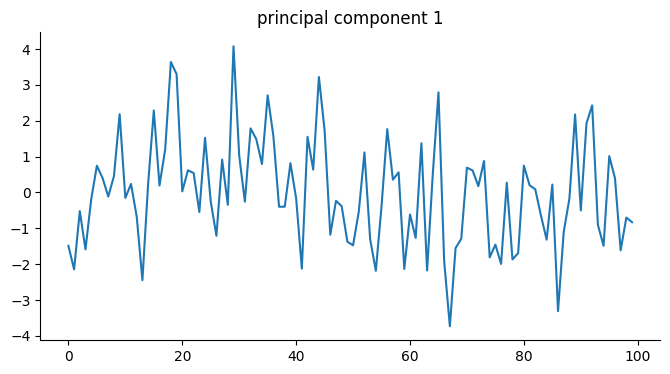

In [ ]:
from matplotlib import pyplot as plt
combined_df_1st_test['principal component 1'].plot(kind='line', figsize=(8, 4), title='principal component 1')
plt.gca().spines[['top', 'right']].set_visible(False)

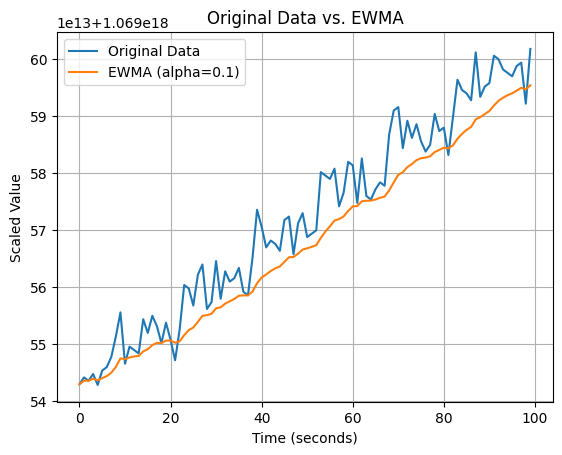

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example interval, replace with your actual interval
interval_in_seconds = 1

# Assuming 'combined_df_1st_test' is already defined and contains numeric data
# Convert time axis to seconds format
time_seconds = combined_df_1st_test.index * interval_in_seconds

# Ensure the first column is numeric
combined_df_1st_test.iloc[:, 0] = pd.to_numeric(combined_df_1st_test.iloc[:, 0], errors='coerce')

# Calculate EWMA (Exponentially Weighted Moving Average)
ewma_data = combined_df_1st_test.iloc[:, 0].ewm(alpha=0.1).mean()

# Plot original data and EWMA
plt.plot(time_seconds, combined_df_1st_test.iloc[:, 0], label='Original Data')
plt.plot(time_seconds, ewma_data, label='EWMA (alpha=0.1)')

# Customize the plot for better readability
plt.xlabel('Time (seconds)')
plt.ylabel('Scaled Value')
plt.title('Original Data vs. EWMA')
plt.legend()
plt.grid(True)
plt.show()


Second Dataset

In [ ]:
import pandas as pd
import os
import re
import numpy as np

def calculate_features(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

def extract_datetime(filename):
    # Use regular expression to extract datetime substring
    match = re.search(r"(\d{4}\.\d{2}\.\d{2}\.\d{2}\.\d{2}\.\d{2})", filename)
    if match:
        datetime_str = match.group(1)  # Extract datetime substring
        datetime = pd.to_datetime(datetime_str, format='%Y.%m.%d.%H.%M.%S')
        time_seconds = datetime.hour * 3600 + datetime.minute * 60 + datetime.second
        return datetime, time_seconds
    else:
        return None, None

def convert_multiple_folders_to_csv(root_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # List to store converted DataFrames
    converted_dfs = []

    # Define columns explicitly
    columns = ['B1X_p2p', 'B1Y_p2p', 'B1X_skew', 'B1Y_skew']

    # Iterate over directories in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        print(f"Processing directory: {dirpath}")
        for filename in filenames:
            print(f"Found file: {filename}")

            # Read the dataset into a DataFrame
            df = pd.read_csv(os.path.join(dirpath, filename), sep="\t")

            # Extract features from the dataset
            features = calculate_features(df)  # You need to define calculate_features() function

            # Create a DataFrame with the extracted features
            features_df = pd.DataFrame([features], columns=columns)

            # Extract datetime from filename
            datetime, time_seconds = extract_datetime(filename)

            # Add datetime column to features_df
            features_df['Datetime'] = datetime

            # Add time_seconds column to features_df
            features_df['Time_seconds'] = time_seconds

            # Define the output path for the CSV file
            output_filename = os.path.join(output_folder, os.path.relpath(dirpath, root_folder), os.path.splitext(filename)[0] + '_converted.csv')

            # Ensure the directory structure exists in the output folder
            os.makedirs(os.path.dirname(output_filename), exist_ok=True)

            # Save the DataFrame as a CSV file
            features_df.to_csv(output_filename, index=False)

            print(f"Converted {os.path.join(dirpath, filename)} to CSV: {output_filename}")

            # Append the converted DataFrame to the list
            converted_dfs.append(features_df)

    return converted_dfs if converted_dfs else None  # Return None if no files found

# Example usage
root_folder = "/content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/2nd_test/2nd_test/dataset"
output_folder = "/content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset"
converted_datasets = convert_multiple_folders_to_csv(root_folder, output_folder)

# Check if converted_datasets is not None before concatenating and saving
if converted_datasets:
    # Concatenate the DataFrames into one DataFrame
    concatenated_df_2nd_test = pd.concat(converted_datasets, ignore_index=True)

    # Define the output path for the concatenated CSV file
    concatenated_output_filename = os.path.join(output_folder, "concatenated_dataset.csv")

    # Save the concatenated DataFrame to a CSV file
    concatenated_df_2nd_test.to_csv(concatenated_output_filename, index=False)

    print(f"Concatenated dataset saved to: {concatenated_output_filename}")
else:
    print("No files found in the specified folders.")


Processing directory: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/2nd_test/2nd_test/dataset
Found file: 2004.02.17.08.42.39
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/2nd_test/2nd_test/dataset/2004.02.17.08.42.39 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2004.02.17.08.42_converted.csv
Found file: 2004.02.17.08.12.39
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/2nd_test/2nd_test/dataset/2004.02.17.08.12.39 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2004.02.17.08.12_converted.csv
Found file: 2004.02.17.05.42.39
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/2nd_test/2nd_test/dataset/2004.02.17.05.42.39 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2004.02.17.05.42_converted.csv
Found file: 2004.02.17.08.02.39
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data

In [ ]:
concatenated_df_2nd_test

,B1X_p2p,B1Y_p2p,B1X_skew,B1Y_skew,Datetime,Time_seconds
0,0.166870,0.098403,0.103796,0.064081,2004-02-17 08:42:39,31359
1,0.169105,0.096915,0.100720,0.064671,2004-02-17 08:12:39,29559
2,0.106695,0.093961,0.097892,0.058847,2004-02-17 05:42:39,20559
3,0.171782,0.098004,0.102653,0.064857,2004-02-17 08:02:39,28959
4,0.106653,0.094247,0.098149,0.058012,2004-02-17 06:12:39,22359
...,...,...,...,...,...,...
95,0.112861,0.096590,0.100540,0.062219,2004-02-17 17:52:39,64359
96,0.106790,0.098734,0.101642,0.061493,2004-02-17 19:52:39,71559
97,0.110869,0.096987,0.102299,0.063086,2004-02-17 18:32:39,66759
98,0.105739,0.098170,0.099729,0.060518,2004-02-17 19:32:39,70359


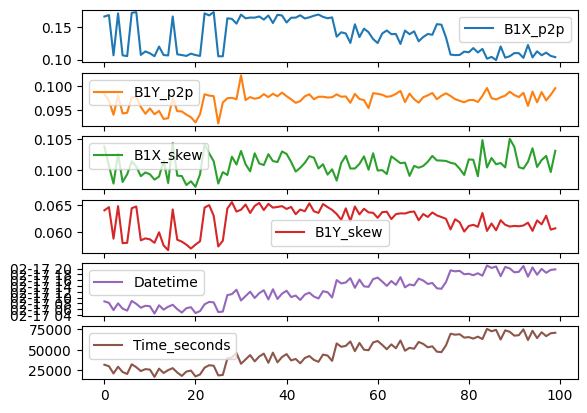

In [ ]:
import matplotlib.pyplot as plt
concatenated_df_2nd_test.plot(subplots=True)  # Creates subplots for each column
plt.show()

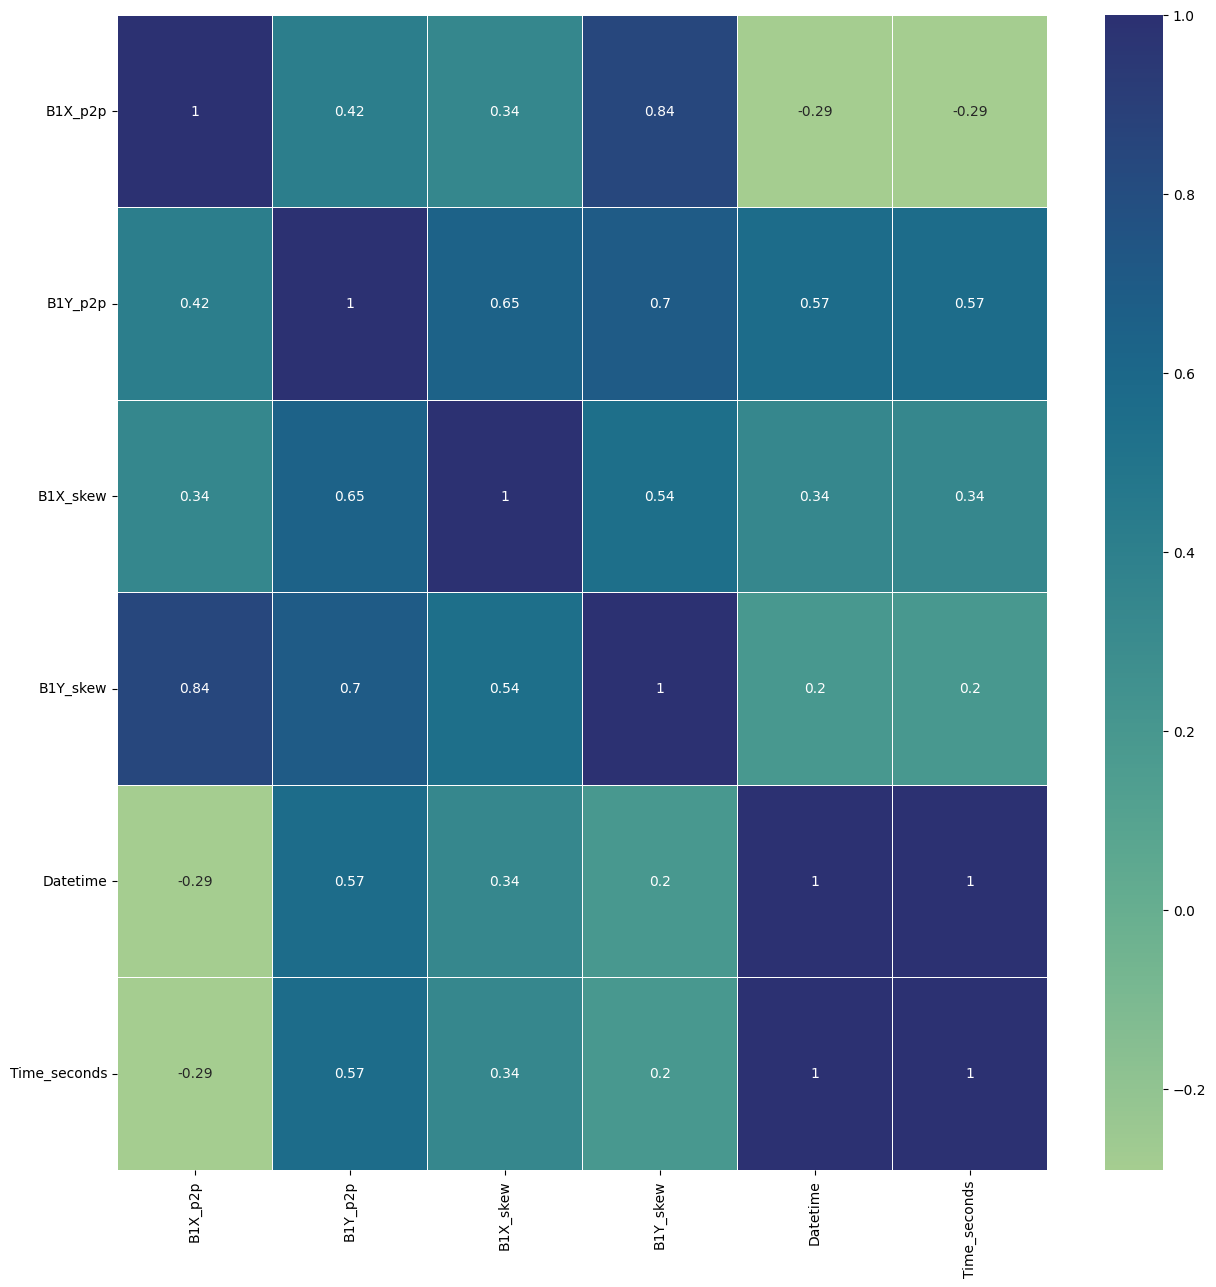

In [ ]:
import seaborn as sns
sns.heatmap(concatenated_df_2nd_test.corr(),annot=True,cmap="crest",linewidths=.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Thrid Dataset

In [ ]:
import pandas as pd
import os
import re
import numpy as np

def calculate_features(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

def extract_datetime(filename):
    # Use regular expression to extract datetime substring
    match = re.search(r"(\d{4}\.\d{2}\.\d{2}\.\d{2}\.\d{2}\.\d{2})", filename)
    if match:
        datetime_str = match.group(1)  # Extract datetime substring
        datetime = pd.to_datetime(datetime_str, format='%Y.%m.%d.%H.%M.%S')
        time_seconds = datetime.hour * 3600 + datetime.minute * 60 + datetime.second
        return datetime, time_seconds
    else:
        return None, None

def convert_multiple_folders_to_csv(root_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # List to store converted DataFrames
    converted_dfs = []

    # Define columns explicitly
    columns = ['B1X_p2p', 'B1Y_p2p', 'B1X_skew', 'B1Y_skew']

    # Iterate over directories in the root folder
    for dirpath, dirnames, filenames in os.walk(root_folder):
        print(f"Processing directory: {dirpath}")
        for filename in filenames:
            print(f"Found file: {filename}")

            # Read the dataset into a DataFrame
            df = pd.read_csv(os.path.join(dirpath, filename), sep="\t")

            # Extract features from the dataset
            features = calculate_features(df)  # You need to define calculate_features() function

            # Create a DataFrame with the extracted features
            features_df = pd.DataFrame([features], columns=columns)

            # Extract datetime from filename
            datetime, time_seconds = extract_datetime(filename)

            # Add datetime column to features_df
            features_df['Datetime'] = datetime

            # Add time_seconds column to features_df
            features_df['Time_seconds'] = time_seconds

            # Define the output path for the CSV file
            output_filename = os.path.join(output_folder, os.path.relpath(dirpath, root_folder), os.path.splitext(filename)[0] + '_converted.csv')

            # Ensure the directory structure exists in the output folder
            os.makedirs(os.path.dirname(output_filename), exist_ok=True)

            # Save the DataFrame as a CSV file
            features_df.to_csv(output_filename, index=False)

            print(f"Converted {os.path.join(dirpath, filename)} to CSV: {output_filename}")

            # Append the converted DataFrame to the list
            converted_dfs.append(features_df)

    return converted_dfs if converted_dfs else None  # Return None if no files found

# Example usage
root_folder = "/content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/3rd_test/4th_test/txt/dataset"
output_folder = "/content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset"
converted_datasets = convert_multiple_folders_to_csv(root_folder, output_folder)

# Check if converted_datasets is not None before concatenating and saving
if converted_datasets:
    # Concatenate the DataFrames into one DataFrame
    concatenated_df_3rd_test = pd.concat(converted_datasets, ignore_index=True)

    # Define the output path for the concatenated CSV file
    concatenated_output_filename = os.path.join(output_folder, "concatenated_dataset.csv")

    # Save the concatenated DataFrame to a CSV file
    concatenated_df_3rd_test.to_csv(concatenated_output_filename, index=False)

    print(f"Concatenated dataset saved to: {concatenated_output_filename}")
else:
    print("No files found in the specified folders.")


Processing directory: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/3rd_test/4th_test/txt/dataset
Found file: 2004.04.16.02.02.55
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/3rd_test/4th_test/txt/dataset/2004.04.16.02.02.55 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2004.04.16.02.02_converted.csv
Found file: 2004.04.16.02.22.55
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/3rd_test/4th_test/txt/dataset/2004.04.16.02.22.55 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2004.04.16.02.22_converted.csv
Found file: 2004.04.16.04.02.55
Converted /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/3rd_test/4th_test/txt/dataset/2004.04.16.04.02.55 to CSV: /content/gdrive/MyDrive/TugasAkhir_5007201224/Data NASA/Converted/New_NASA_Dataset/./2004.04.16.04.02_converted.csv
Found file: 2004.04.16.04.22.55
Converted /content/gdrive/MyDrive/TugasAkhir

In [ ]:
concatenated_df_3rd_test

,B1X_p2p,B1Y_p2p,B1X_skew,B1Y_skew,Datetime,Time_seconds
0,0.079036,0.081870,0.082895,0.055428,2004-04-16 02:02:55,7375
1,0.077732,0.081291,0.081153,0.054516,2004-04-16 02:22:55,8575
2,0.076337,0.079899,0.079654,0.055488,2004-04-16 04:02:55,14575
3,0.076911,0.079219,0.081455,0.055899,2004-04-16 04:22:55,15775
4,0.077206,0.082513,0.081045,0.056245,2004-04-16 01:52:55,6775
...,...,...,...,...,...,...
95,0.077539,0.087180,0.085122,0.060128,2004-04-16 17:22:55,62575
96,0.077295,0.084566,0.084265,0.063343,2004-04-16 15:32:55,55975
97,0.077202,0.085228,0.084667,0.061733,2004-04-16 14:42:55,52975
98,0.078255,0.086690,0.086181,0.061133,2004-04-16 16:12:55,58375


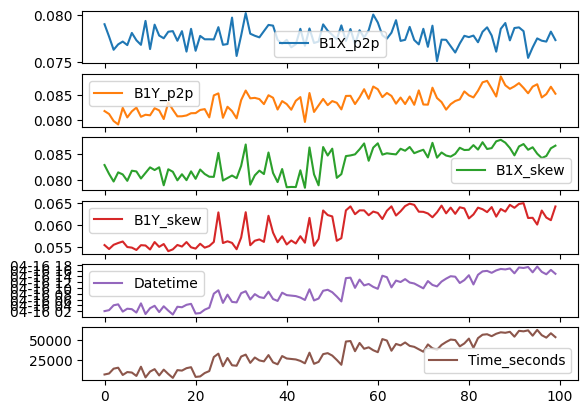

In [ ]:
import matplotlib.pyplot as plt
concatenated_df_3rd_test.plot(subplots=True)  # Creates subplots for each column
plt.show()

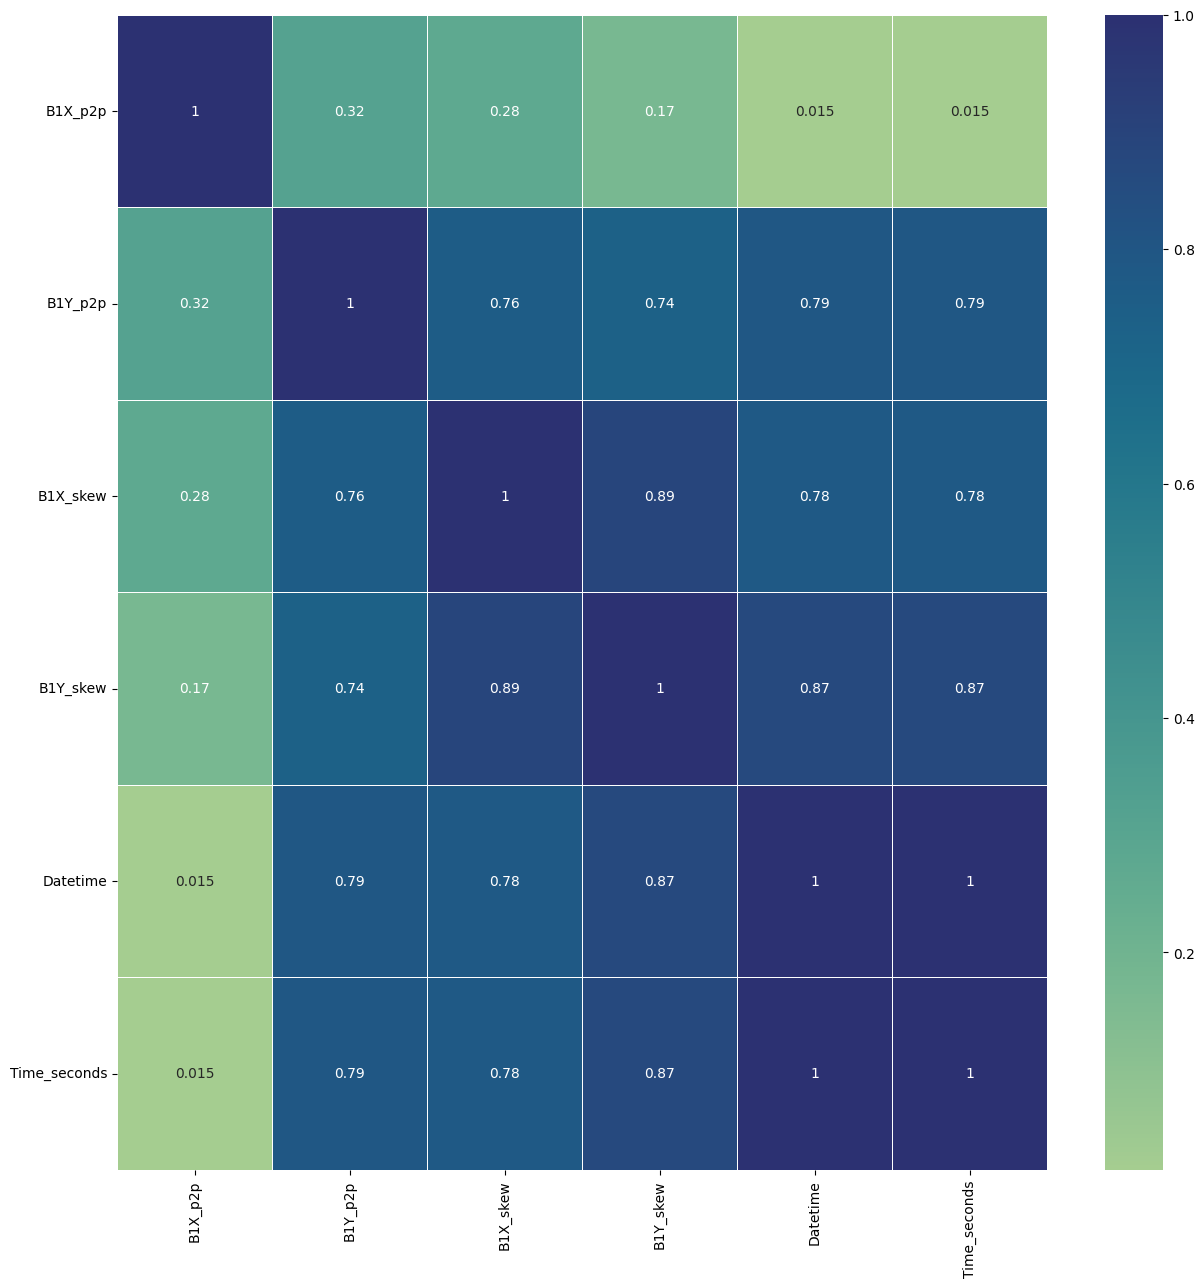

In [ ]:
import seaborn as sns
sns.heatmap(concatenated_df_3rd_test.corr(),annot=True,cmap="crest",linewidths=.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Concatenated All File in First Dataset, Second Dataset, Thrid Dataset

In [ ]:
New_NASA_Dataset = pd.concat([concatenated_df_1st_test, concatenated_df_2nd_test], axis=0, ignore_index=True)

In [ ]:
New_NASA_Dataset

,B1X_p2p,B1Y_p2p,B1X_skew,B1Y_skew,Datetime,Time_seconds
0,0.154765,0.148371,0.153090,0.141916,2003-11-22 23:16:56,83816
1,0.154178,0.148745,0.153291,0.140957,2003-11-22 23:36:56,85016
2,0.154798,0.149150,0.153269,0.142565,2003-11-22 23:26:56,84416
3,0.154753,0.147927,0.153789,0.141652,2003-11-22 23:46:56,85616
4,0.155969,0.149597,0.153720,0.141213,2003-11-22 23:14:58,83698
...,...,...,...,...,...,...
195,0.112861,0.096590,0.100540,0.062219,2004-02-17 17:52:39,64359
196,0.106790,0.098734,0.101642,0.061493,2004-02-17 19:52:39,71559
197,0.110869,0.096987,0.102299,0.063086,2004-02-17 18:32:39,66759
198,0.105739,0.098170,0.099729,0.060518,2004-02-17 19:32:39,70359


In [ ]:
New_NASA_Dataset = pd.concat([New_NASA_Dataset, concatenated_df_3rd_test], axis=0, ignore_index=True)

In [ ]:
New_NASA_Dataset

,B1X_p2p,B1Y_p2p,B1X_skew,B1Y_skew,Datetime,Time_seconds
0,0.154765,0.148371,0.153090,0.141916,2003-11-22 23:16:56,83816
1,0.154178,0.148745,0.153291,0.140957,2003-11-22 23:36:56,85016
2,0.154798,0.149150,0.153269,0.142565,2003-11-22 23:26:56,84416
3,0.154753,0.147927,0.153789,0.141652,2003-11-22 23:46:56,85616
4,0.155969,0.149597,0.153720,0.141213,2003-11-22 23:14:58,83698
...,...,...,...,...,...,...
295,0.077539,0.087180,0.085122,0.060128,2004-04-16 17:22:55,62575
296,0.077295,0.084566,0.084265,0.063343,2004-04-16 15:32:55,55975
297,0.077202,0.085228,0.084667,0.061733,2004-04-16 14:42:55,52975
298,0.078255,0.086690,0.086181,0.061133,2004-04-16 16:12:55,58375


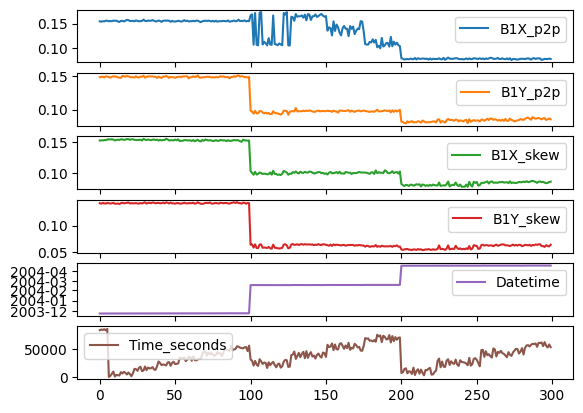

In [ ]:
import matplotlib.pyplot as plt
New_NASA_Dataset.plot(subplots=True)  # Creates subplots for each column
plt.show()

In [ ]:
New_NASA_Dataset

,B1X_p2p,B1Y_p2p,B1X_skew,B1Y_skew,Datetime,Time_seconds
0,0.154765,0.148371,0.153090,0.141916,2003-11-22 23:16:56,83816
1,0.154178,0.148745,0.153291,0.140957,2003-11-22 23:36:56,85016
2,0.154798,0.149150,0.153269,0.142565,2003-11-22 23:26:56,84416
3,0.154753,0.147927,0.153789,0.141652,2003-11-22 23:46:56,85616
4,0.155969,0.149597,0.153720,0.141213,2003-11-22 23:14:58,83698
...,...,...,...,...,...,...
295,0.077539,0.087180,0.085122,0.060128,2004-04-16 17:22:55,62575
296,0.077295,0.084566,0.084265,0.063343,2004-04-16 15:32:55,55975
297,0.077202,0.085228,0.084667,0.061733,2004-04-16 14:42:55,52975
298,0.078255,0.086690,0.086181,0.061133,2004-04-16 16:12:55,58375


## Heatmap

First Dataset

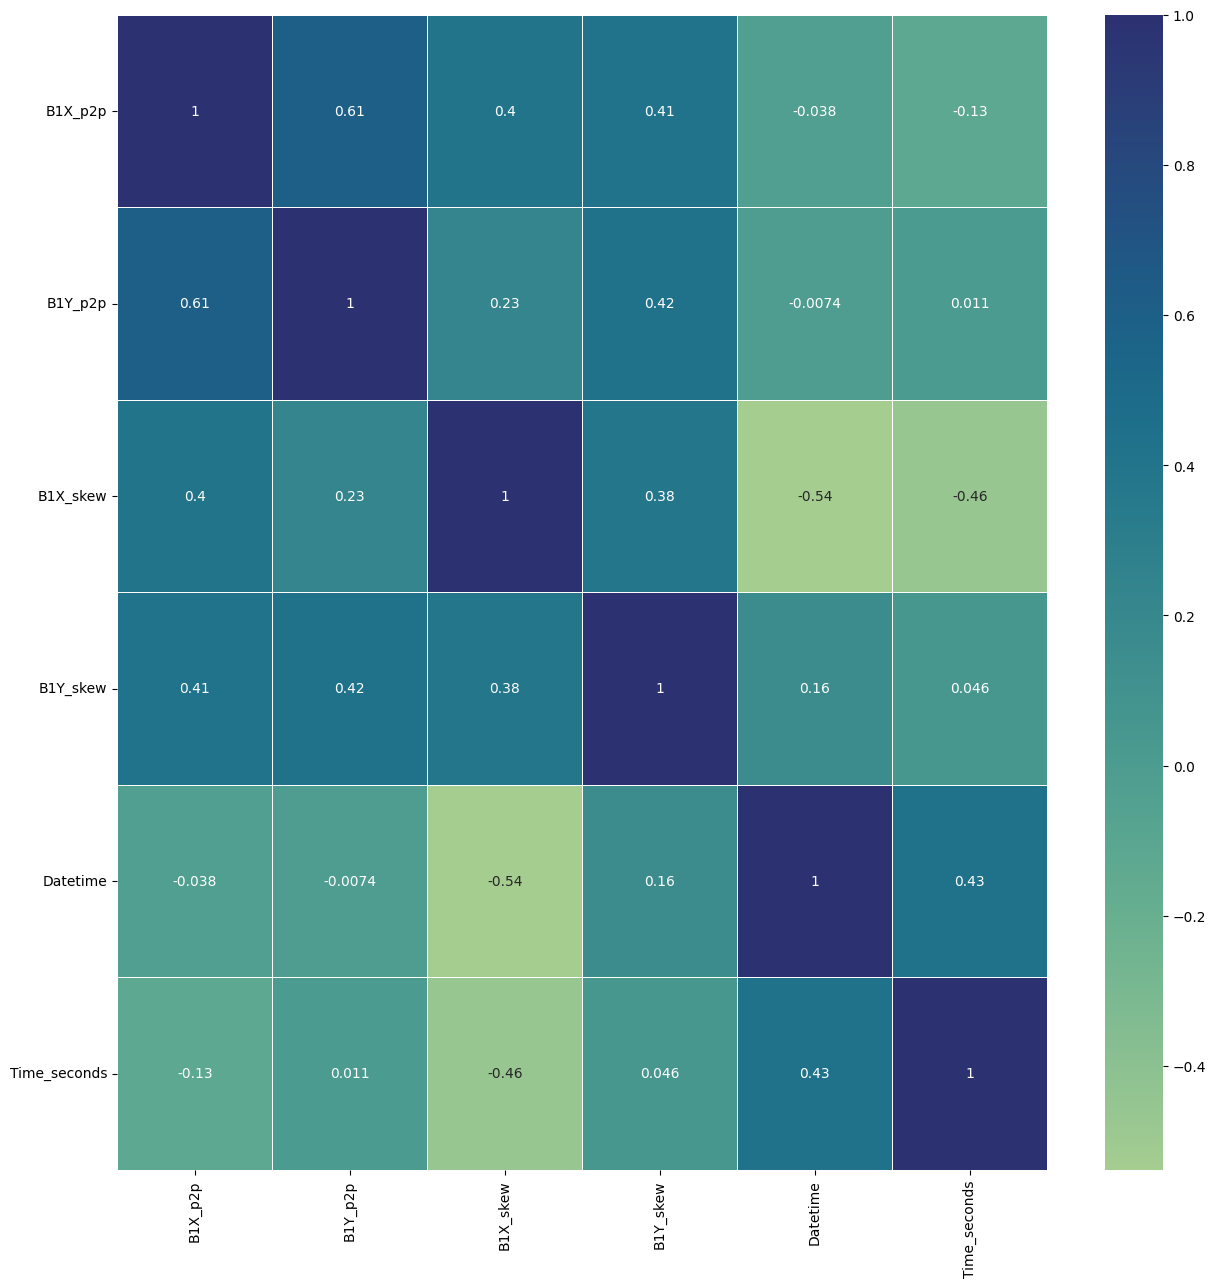

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(concatenated_df_1st_test.corr(),annot=True,cmap="crest",linewidths=.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

## PCA

First Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'concatenated_df_1st_test' is your DataFrame
# Exclude datetime columns if any
numerical_columns = [col for col in concatenated_df_1st_test.columns if concatenated_df_1st_test[col].dtype in [np.float64, np.int64]]

# Select only numerical columns
X = concatenated_df_1st_test[numerical_columns]

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=X_pca, columns=['principal component 1'])

# Display the principal component DataFrame
principal_df

,principal component 1
0,-1.488731
1,-2.145110
2,-0.522130
3,-1.588058
4,-0.198378
...,...
95,1.011314
96,0.400211
97,-1.612368
98,-0.700347


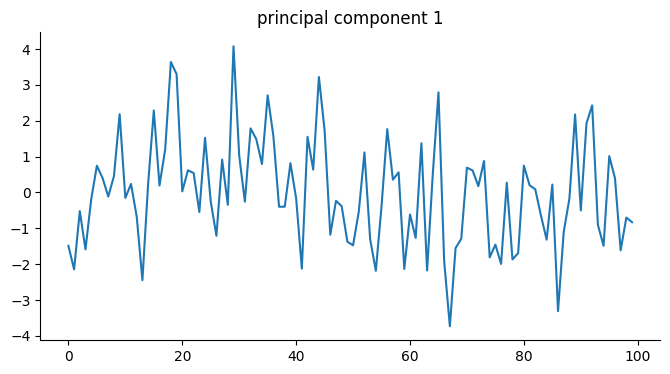

In [ ]:
from matplotlib import pyplot as plt
principal_df['principal component 1'].plot(kind='line', figsize=(8, 4), title='principal component 1')
plt.gca().spines[['top', 'right']].set_visible(False)

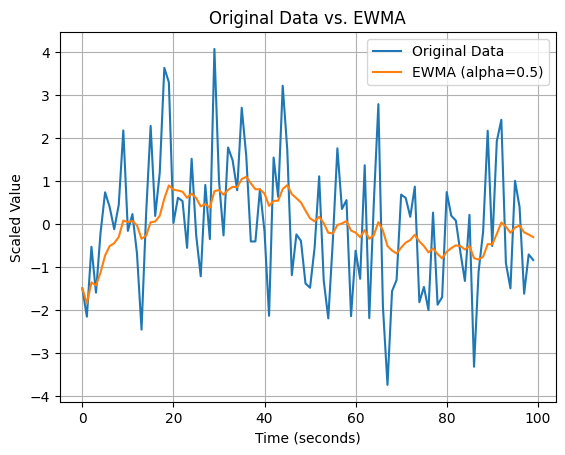

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the interval in seconds
interval_in_seconds = 1  # Example interval, replace with your actual interval

# Convert time axis to seconds format (assuming 'time_axis' is your time axis column)
time_seconds = principal_df.index * interval_in_seconds

# Assuming 'df_scaled2' is your DataFrame with no header
ewma_data = principal_df.iloc[:, 0].ewm(alpha=0.1).mean()

# Plot original data and EWMA
plt.plot(time_seconds, principal_df.iloc[:, 0], label='Original Data')
plt.plot(time_seconds, ewma_data, label='EWMA (alpha=0.5)')

# Customize the plot for better readability
plt.xlabel('Time (seconds)')
plt.ylabel('Scaled Value')
plt.title('Original Data vs. EWMA')
plt.legend()
plt.grid(True)
plt.show()


### ARIMA Method

Reference web: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

First Dataset

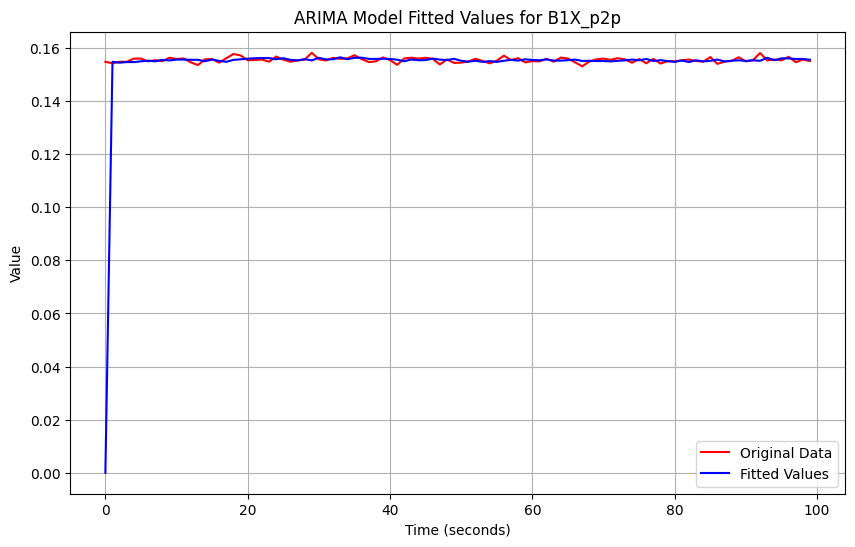

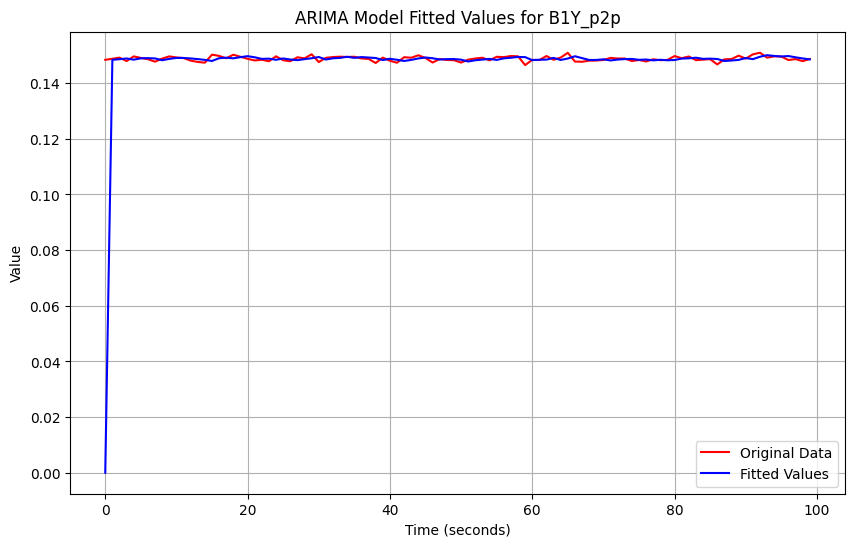

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


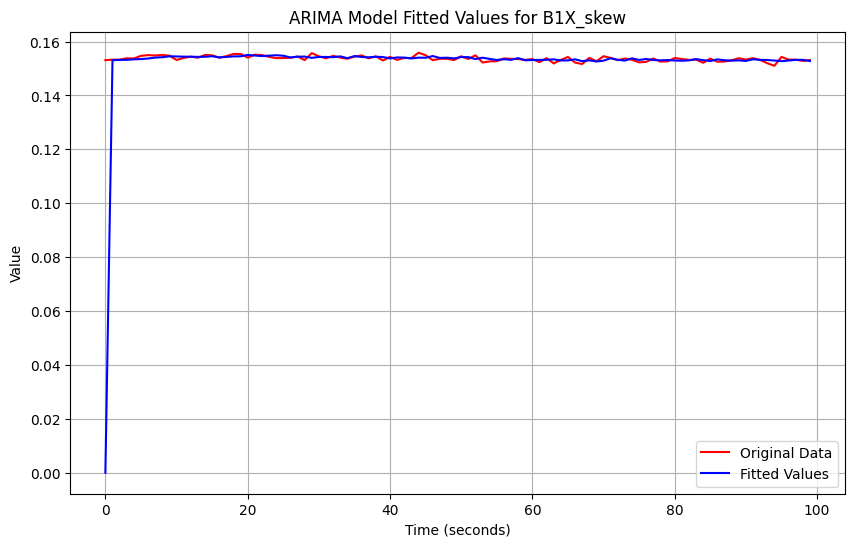

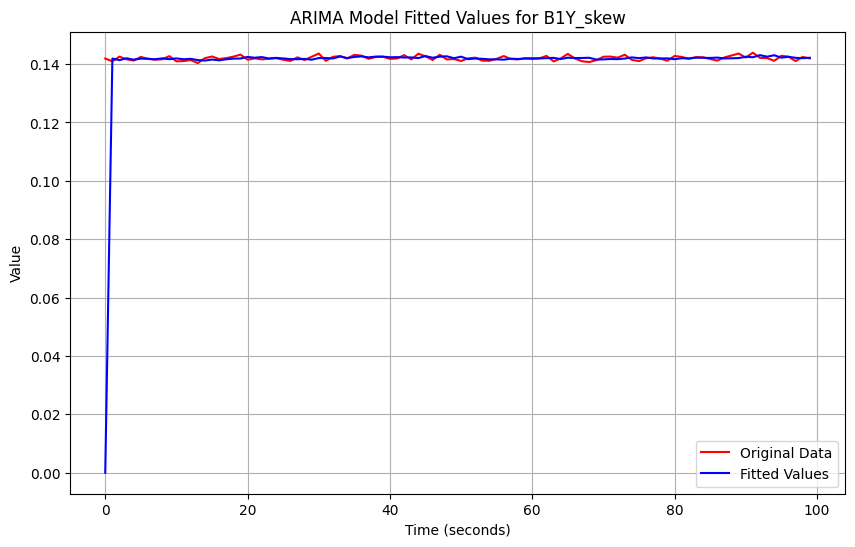

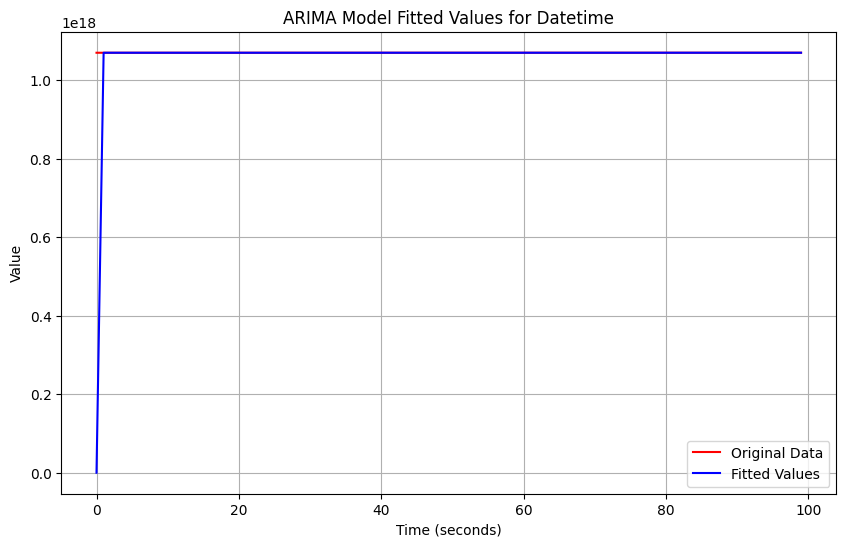

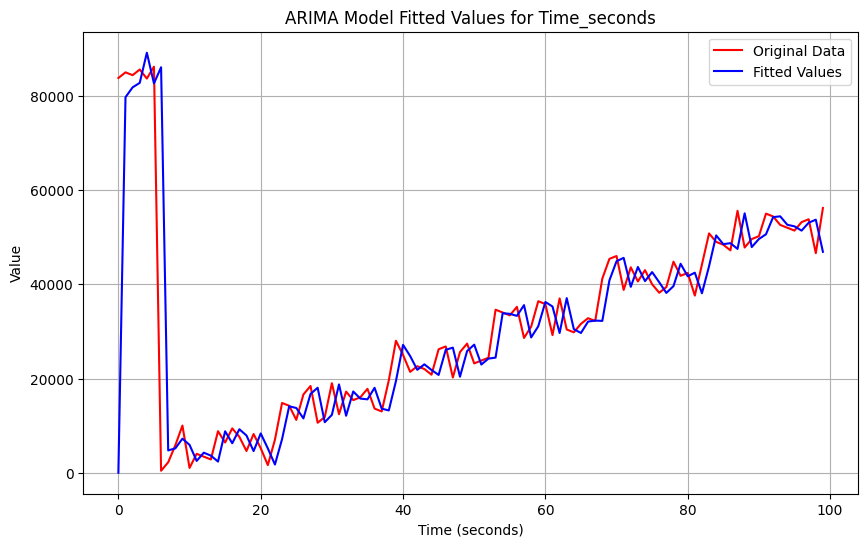

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define the interval in seconds
interval_in_seconds = 1  # Example interval, replace with your actual interval

# Convert time axis to seconds format (assuming 'time_axis' is your time axis column)
time_seconds = principal_df.index * interval_in_seconds

# Iterate over each column and fit ARIMA model separately
for column in concatenated_df_1st_test_numeric.columns:
    # Fit ARIMA model for the current column
    model = ARIMA(concatenated_df_1st_test_numeric[column], order=(5, 1, 0))  # Example order, adjust as needed
    model_fit = model.fit()

    # Get fitted values
    fitted_values = model_fit.fittedvalues

    # Plot original data and fitted values for the current column
    plt.figure(figsize=(10, 6))
    plt.plot(time_seconds, concatenated_df_1st_test_numeric[column], label='Original Data', color='red')
    plt.plot(time_seconds, fitted_values, label='Fitted Values', color='blue')
    plt.title(f'ARIMA Model Fitted Values for {column}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


ARIMA Fit Residual Error Line Plot with peak to peak method

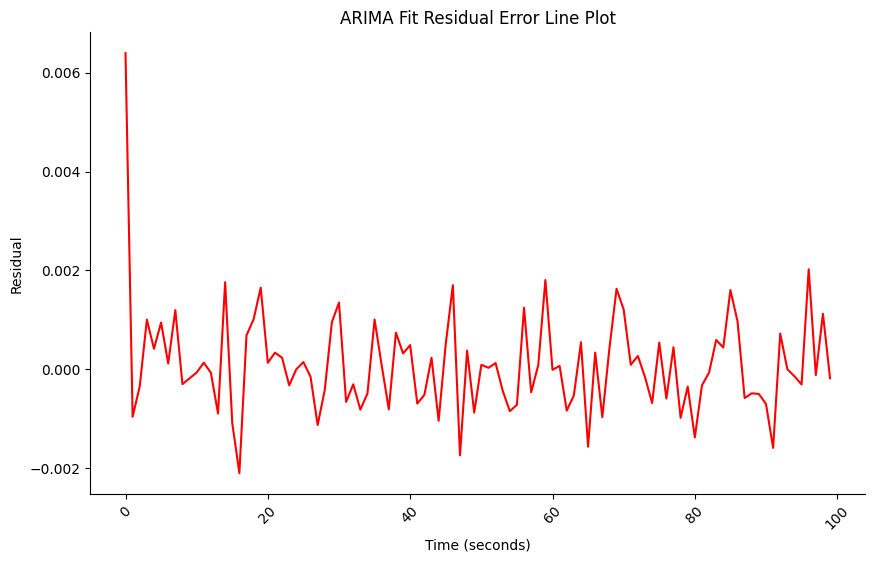

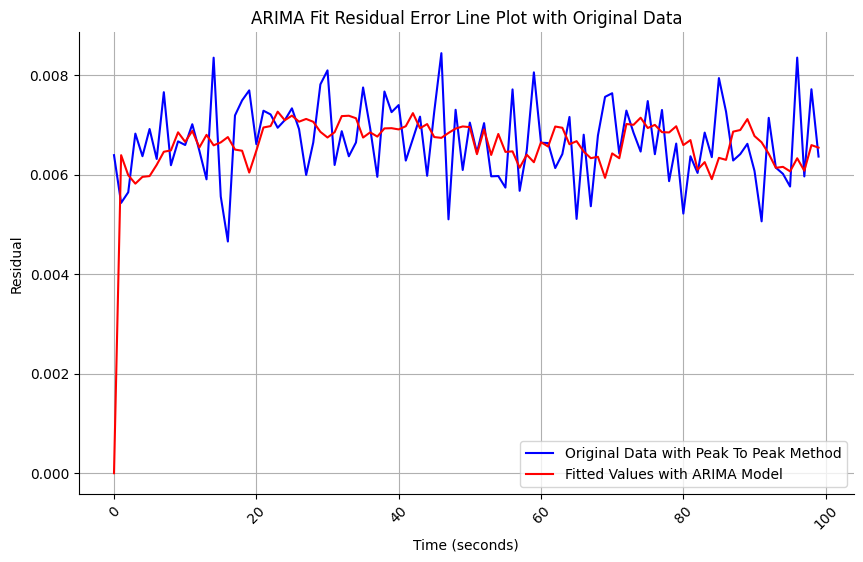

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Define the interval in seconds
interval_in_seconds = 1  # Example interval, replace with your actual interval

# Convert time axis to seconds format (assuming 'time_axis' is your time axis column)
time_seconds = concatenated_df_1st_test_numeric.index * interval_in_seconds

# Assuming you have a DataFrame containing timestamp, coordinate x, and coordinate y data
# Replace 'timestamp_column', 'coordinate_x_column', and 'coordinate_y_column' with the actual column names
timestamp_column = 'Datetime'
coordinate_x_column = 'B1X_p2p'
coordinate_y_column = 'B1Y_p2p'

# Calculate peak-to-peak values
peak_to_peak_values = concatenated_df_1st_test_numeric[coordinate_x_column] - concatenated_df_1st_test_numeric[coordinate_y_column]

# Fit ARIMA model
model = ARIMA(peak_to_peak_values, order=(5, 1, 0))  # Example order, adjust as needed
model_fit = model.fit()

# Get residuals
residuals = model_fit.resid

# Plot residuals against time in seconds
plt.figure(figsize=(10, 6))
plt.plot(time_seconds, residuals, color='red')
sns.despine()
plt.title('ARIMA Fit Residual Error Line Plot')
plt.xlabel('Time (seconds)')
plt.ylabel('Residual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Now, let's plot the original data with the ARIMA fitted values
plt.figure(figsize=(10, 6))
plt.plot(time_seconds, peak_to_peak_values, label='Original Data with Peak To Peak Method', color='blue')
plt.plot(time_seconds, model_fit.fittedvalues, label='Fitted Values with ARIMA Model', color='red')
sns.despine()
plt.title('ARIMA Fit Residual Error Line Plot with Original Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Residual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()


### Peak to peak method

Reference web: https://dynamox.net/en/blog/the-peak-peak-to-peak-and-rms-values-in-vibration-analysis

First Dataset

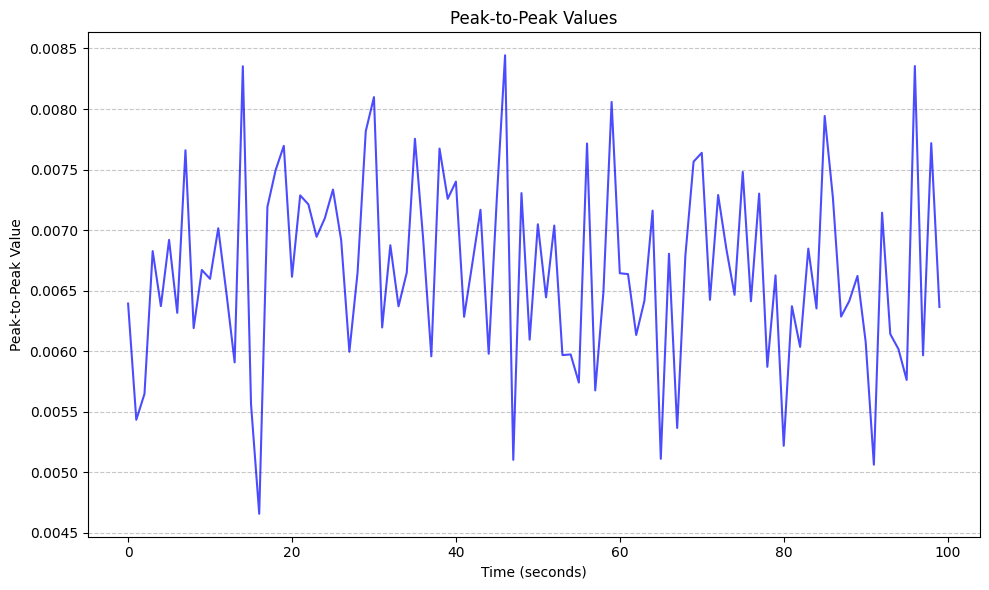

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the interval in seconds
interval_in_seconds = 1  # Example interval, replace with your actual interval

# Convert time axis to seconds format (assuming 'time_axis' is your time axis column)
time_seconds = concatenated_df_1st_test_numeric.index * interval_in_seconds

# Assuming you have a DataFrame 'New_NASA_Dataset' with the relevant data
# Replace 'coordinate_x_column' and 'coordinate_y_column' with the actual column names containing your data
coordinate_x_column = 'B1X_p2p'
coordinate_y_column = 'B1Y_p2p'

# Calculate peak-to-peak values
peak_to_peak_values = concatenated_df_1st_test_numeric[coordinate_x_column] - concatenated_df_1st_test_numeric[coordinate_y_column]

# Plot peak-to-peak values
plt.figure(figsize=(10, 6))
plt.plot(time_seconds,peak_to_peak_values, color='blue', alpha=0.7)
plt.title('Peak-to-Peak Values')
plt.xlabel('Time (seconds)')
plt.ylabel('Peak-to-Peak Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Skew Method

Symmetric distribution with values evenly centered around the mean
and the result is Normal Skewness

Reference web: https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis

First Dataset

not using formula but with library .skew()

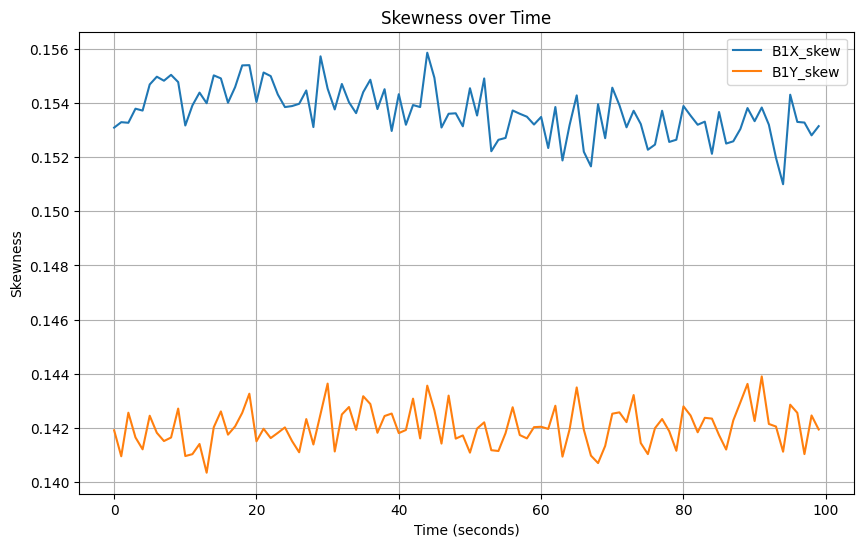

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the interval in seconds
interval_in_seconds = 1  # Example interval, replace with your actual interval

# Convert time axis to seconds format (assuming 'time_axis' is your time axis column)
time_seconds = concatenated_df_1st_test_numeric.index * interval_in_seconds

# Assuming you have a DataFrame 'concatenated_df_1st_test_numeric' with the relevant data
# Replace 'column_names' with the actual column names you want to calculate skewness for
column_names = ['B1X_skew', 'B1Y_skew']

# Calculate skewness for each column
skewness = concatenated_df_1st_test_numeric[column_names].skew()

# Plot skewness values as a line plot
plt.figure(figsize=(10, 6))
for column in column_names:
    plt.plot(time_seconds, concatenated_df_1st_test_numeric[column], label=column)
plt.title('Skewness over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Skewness')
plt.legend()
plt.grid(True)
plt.show()


The moment-based skewness scores formula

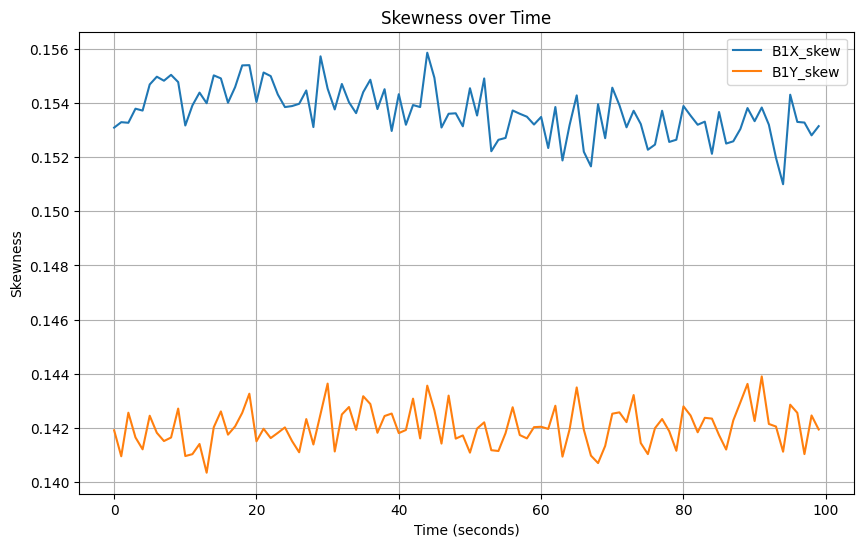

The moment-based skewness scores:
B1X_skew: -0.12391
B1Y_skew: 0.29209


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the interval in seconds
interval_in_seconds = 1  # Example interval, replace with your actual interval

# Convert time axis to seconds format (assuming 'time_axis' is your time axis column)
time_seconds = concatenated_df_1st_test_numeric.index * interval_in_seconds

# Assuming you have a DataFrame 'concatenated_df_1st_test_numeric' with the relevant data
# Replace 'column_names' with the actual column names you want to calculate skewness for
column_names = ['B1X_skew', 'B1Y_skew']

# Function to calculate moment-based skewness
def moment_based_skew(distribution):
    n = len(distribution)
    mean = np.mean(distribution)
    std = np.std(distribution)

    # Divide the formula into two parts
    first_part = n / ((n - 1) * (n - 2))
    second_part = np.sum(((distribution - mean) / std) ** 3)

    skewness = first_part * second_part

    return skewness

# Calculate skewness for each column
skewness = {}
for column in column_names:
    skewness[column] = moment_based_skew(concatenated_df_1st_test_numeric[column])

# Plot skewness values as a line plot
plt.figure(figsize=(10, 6))
for column in column_names:
    plt.plot(time_seconds, concatenated_df_1st_test_numeric[column], label=column)
plt.title('Skewness over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Skewness')
plt.legend()
plt.grid(True)
plt.show()

# Print the skewness score for each column
print("The moment-based skewness scores:")
for column, skew in skewness.items():
    print(f"{column}: {skew:.5f}")


## coba-coba

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 937.480
Date:                Wed, 08 May 2024   AIC                          -1862.961
Time:                        15:42:31   BIC                          -1840.758
Sample:                             0   HQIC                         -1854.074
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5933      0.024    -24.557      0.000      -0.641      -0.546
ar.L2         -0.5589      0.025    -22.467      0.000      -0.608      -0.510
ar.L3         -0.3774      0.033    -11.353      0.0

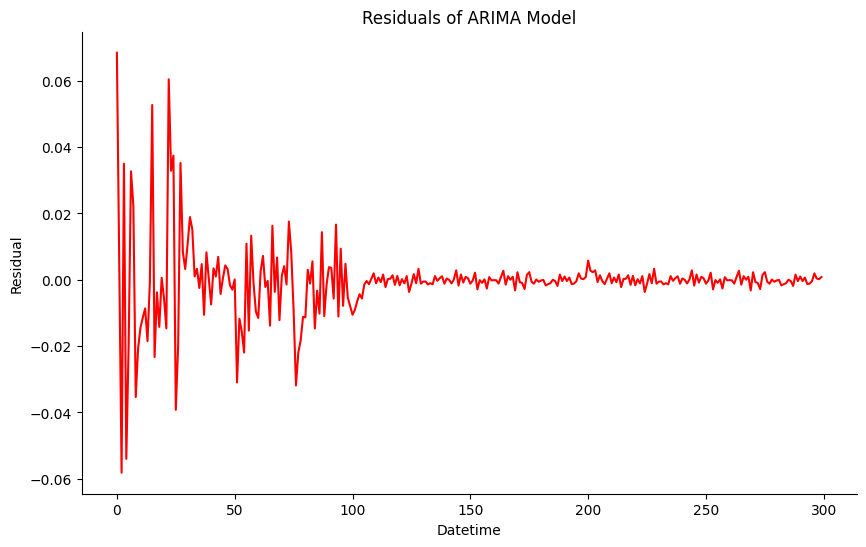

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame containing timestamp, coordinate x, and coordinate y data
# Replace 'timestamp_column', 'coordinate_x_column', and 'coordinate_y_column' with the actual column names
timestamp_column = 'Datetime'
coordinate_x_column = 'B1X_p2p'
coordinate_y_column = 'B1Y_p2p'

# Calculate peak-to-peak values
peak_to_peak_values = New_NASA_Dataset[coordinate_x_column] - New_NASA_Dataset[coordinate_y_column]

# Check stationarity (if needed) and perform necessary preprocessing

# Fit ARIMA model
model = ARIMA(peak_to_peak_values, order=(5, 1, 0))  # Example order, adjust as needed
model_fit = model.fit()

# Summary of the fitted model
print(model_fit.summary())

# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='red')  # Use a numeric index for x-axis
sns.despine()
plt.title('Residuals of ARIMA Model')
plt.xlabel('Datetime')
plt.ylabel('Residual')
plt.show()

# Evaluate model performance and make forecasts as needed


Common Arima Method Each Coordinate 'B1X_p2p', 'B1Y_p2p' Column

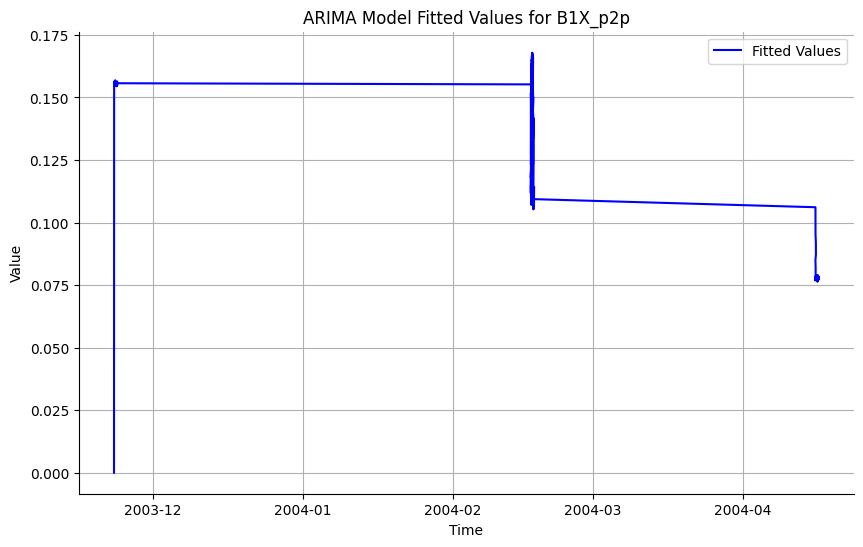

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


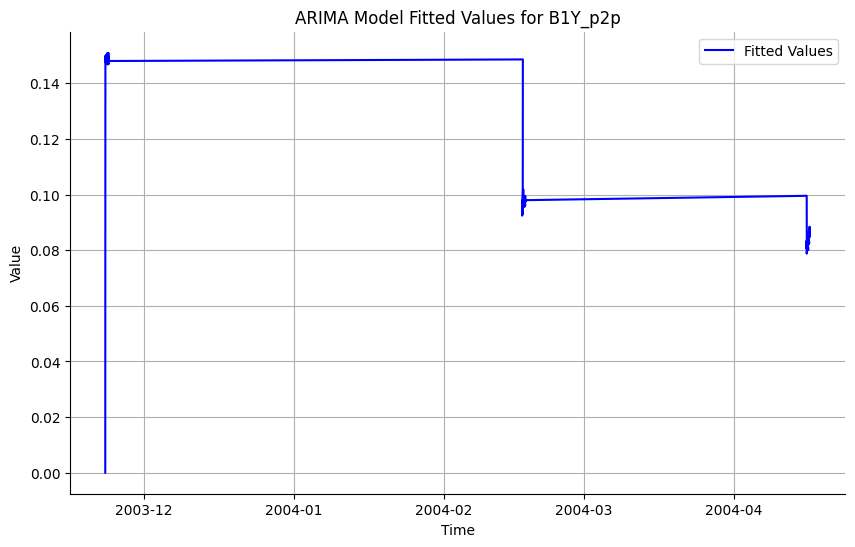

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame 'New_NASA_Dataset' with the relevant data
# Replace 'coordinate' with the actual list of column names containing your time series data
timestamp_column = 'Datetime'
coordinates = ['B1X_p2p', 'B1Y_p2p']

# Fit separate ARIMA models for each column
for coordinate in coordinates:
    # Fit ARIMA model
    model = ARIMA(New_NASA_Dataset[coordinate], order=(5, 1, 0))  # Example order, adjust as needed
    model_fit = model.fit()

    # Get fitted values
    fitted_values = model_fit.fittedvalues

    # Plot original data and fitted values
    plt.figure(figsize=(10, 6))
    #plt.plot(New_NASA_Dataset[timestamp_column], New_NASA_Dataset[coordinate], label='Original Data', color='blue')
    plt.plot(New_NASA_Dataset[timestamp_column], fitted_values, label='Fitted Values', color='blue')
    sns.despine()
    plt.title(f'ARIMA Model Fitted Values for {coordinate}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


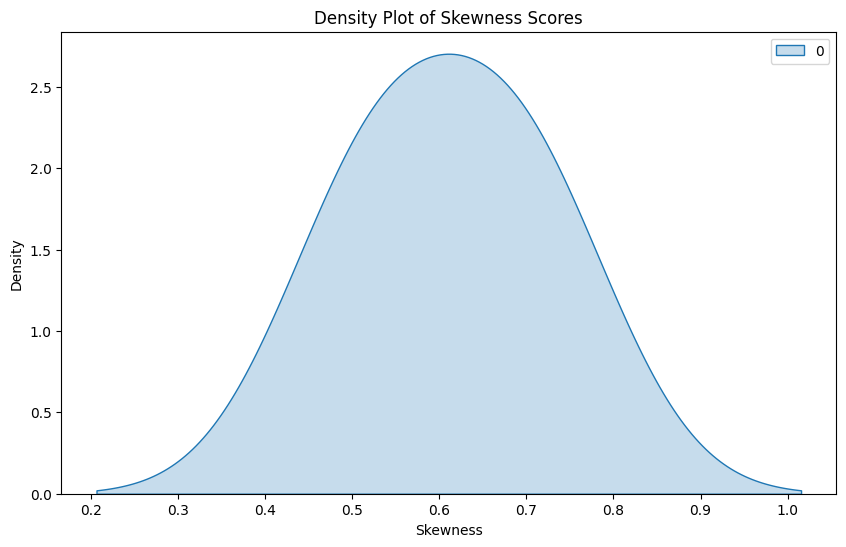

The moment-based skewness scores:
B1X_skew: 0.52482
B1Y_skew: 0.69717


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate moment-based skewness
def moment_based_skew(distribution):
    n = len(distribution)
    mean = np.mean(distribution)
    std = np.std(distribution)

    # Divide the formula into two parts
    first_part = n / ((n - 1) * (n - 2))
    second_part = np.sum(((distribution - mean) / std) ** 3)

    skewness = first_part * second_part

    return skewness

# Example dataset
column_names = ['B1X_skew', 'B1Y_skew']

# Calculate skewness for each column
skewness = {}
for column in column_names:
    skewness[column] = moment_based_skew(New_NASA_Dataset[column])

# Plot skewness scores as a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(skewness.values(), color='skyblue', fill=True)
plt.title("Density Plot of Skewness Scores")
plt.xlabel("Skewness")
plt.ylabel("Density")
plt.show()

# Print the skewness score for each column
print("The moment-based skewness scores:")
for column, skew in skewness.items():
    print(f"{column}: {skew:.5f}")


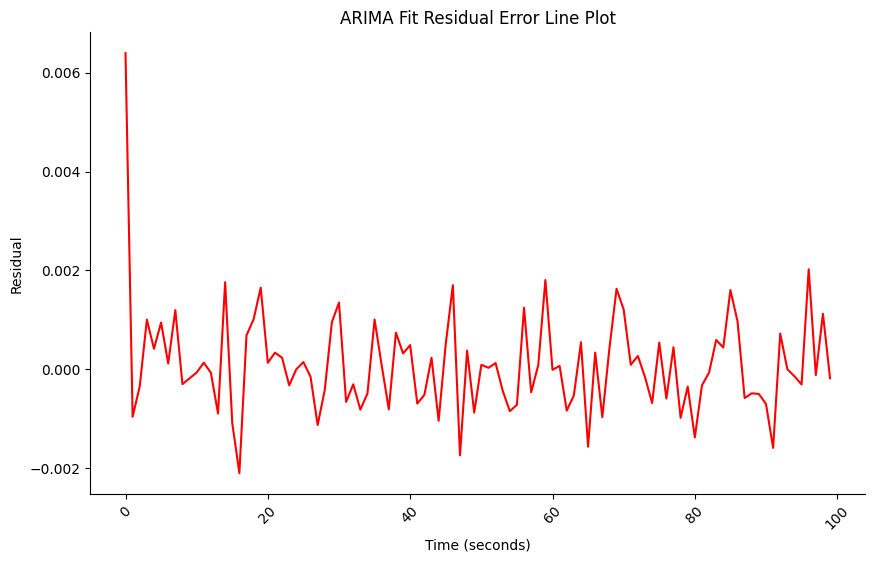

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Define the interval in seconds
interval_in_seconds = 1  # Example interval, replace with your actual interval

# Convert time axis to seconds format (assuming 'time_axis' is your time axis column)
time_seconds = concatenated_df_1st_test_numeric.index * interval_in_seconds

# Assuming you have a DataFrame containing timestamp, coordinate x, and coordinate y data
# Replace 'timestamp_column', 'coordinate_x_column', and 'coordinate_y_column' with the actual column names
timestamp_column = 'Datetime'
coordinate_x_column = 'B1X_p2p'
coordinate_y_column = 'B1Y_p2p'

# Calculate peak-to-peak values
peak_to_peak_values = concatenated_df_1st_test_numeric[coordinate_x_column] - concatenated_df_1st_test_numeric[coordinate_y_column]

# Fit ARIMA model
model = ARIMA(peak_to_peak_values, order=(5, 1, 0))  # Example order, adjust as needed
model_fit = model.fit()

# Get residuals
residuals = model_fit.resid

# Plot residuals against time in seconds
plt.figure(figsize=(10, 6))
plt.plot(time_seconds, residuals, color='red')
sns.despine()
plt.title('ARIMA Fit Residual Error Line Plot')
plt.xlabel('Time (seconds)')
plt.ylabel('Residual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 924.451
Date:                Wed, 08 May 2024   AIC                          -1836.901
Time:                        16:32:42   BIC                          -1814.699
Sample:                    01-01-1970   HQIC                         -1828.015
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5386      0.025    -21.375      0.000      -0.588      -0.489
ar.L2         -0.5254      0.026    -20.394      0.000      -0.576      -0.475
ar.L3         -0.3168      0.028    -11.249      0.0

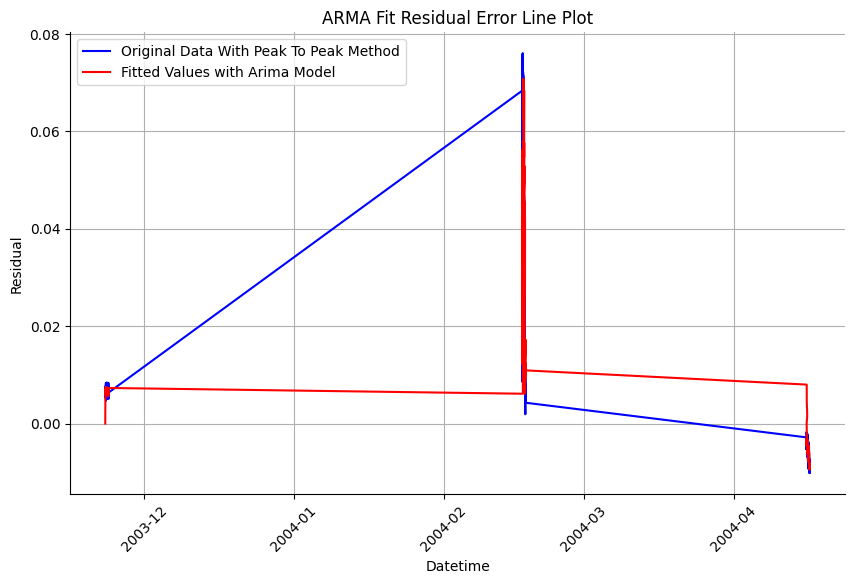

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame containing timestamp, coordinate x, and coordinate y data
# Replace 'timestamp_column', 'coordinate_x_column', and 'coordinate_y_column' with the actual column names
timestamp_column = 'Datetime'
coordinate_x_column = 'B1X_p2p'
coordinate_y_column = 'B1Y_p2p'

# Calculate peak-to-peak values
peak_to_peak_values = New_NASA_Dataset[coordinate_x_column] - New_NASA_Dataset[coordinate_y_column]

# Check stationarity (if needed) and perform necessary preprocessing

# Fit ARIMA model
model = ARIMA(peak_to_peak_values, order=(5, 1, 0))  # Example order, adjust as needed
model_fit = model.fit()

# Summary of the fitted model
print(model_fit.summary())

# Plot residuals against dates
plt.figure(figsize=(10, 6))
plt.plot(New_NASA_Dataset[timestamp_column], peak_to_peak_values, label='Original Data With Peak To Peak Method', color='blue')
plt.plot(New_NASA_Dataset[timestamp_column], model_fit.fittedvalues, label='Fitted Values with Arima Model', color='red')
sns.despine()
plt.title('ARMA Fit Residual Error Line Plot')
plt.xlabel('Datetime')
plt.ylabel('Residual')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance and make forecasts as needed


ARMA Fit Residual Error Density Plot

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


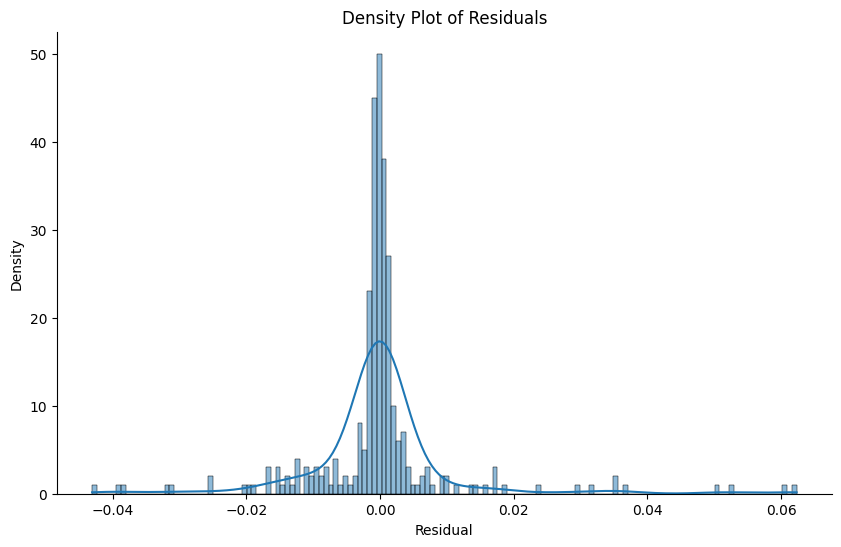

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a DataFrame containing your data
# Replace 'timestamp_column', 'coordinate_x_column', and 'coordinate_y_column' with the actual column names
timestamp_column = 'Datetime'
coordinate_x_column = 'B1X_p2p'
coordinate_y_column = 'B1Y_p2p'

# Calculate peak-to-peak values
peak_to_peak_values = New_NASA_Dataset[coordinate_x_column] - New_NASA_Dataset[coordinate_y_column]

# Check stationarity (if needed) and perform necessary preprocessing

# Fit ARIMA model
model = ARIMA(peak_to_peak_values, order=(5, 1, 0))  # Example order, adjust as needed
model_fit = model.fit()

# Calculate residuals
residuals = model_fit.resid

# Plot density of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
sns.despine()
plt.title('Density Plot of Residuals')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.show()


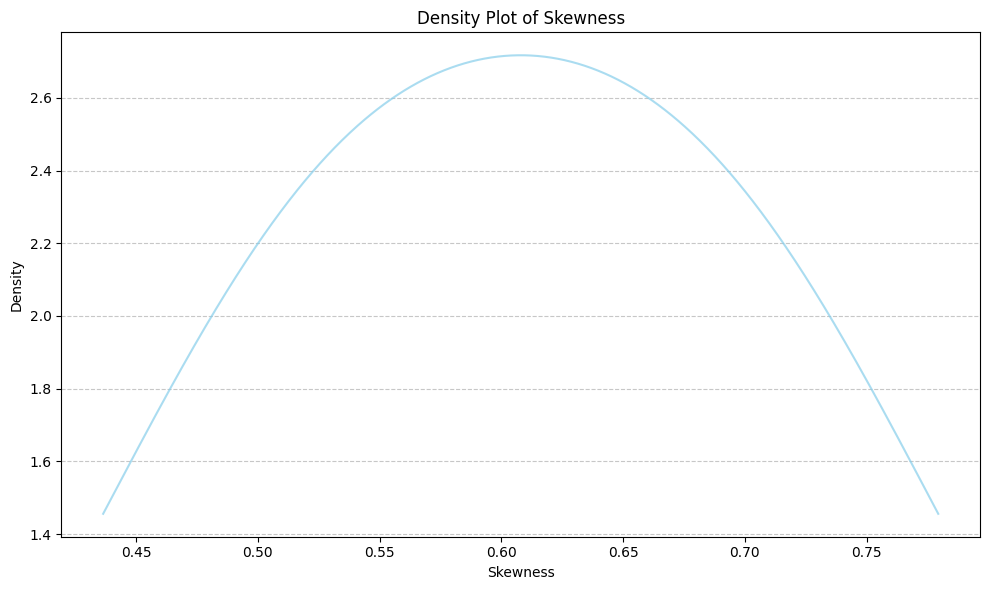

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'New_NASA_Dataset' with the relevant data
# Replace 'column_names' with the actual column names you want to calculate skewness for
column_names = ['B1X_skew',	'B1Y_skew']

# Calculate skewness for each column
skewness = New_NASA_Dataset[column_names].skew()

# Plot skewness values as a density plot
plt.figure(figsize=(10, 6))
skewness.plot(kind='density', color='skyblue', alpha=0.7)
plt.title('Density Plot of Skewness')
plt.xlabel('Skewness')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The Pierson's second skewness score formula

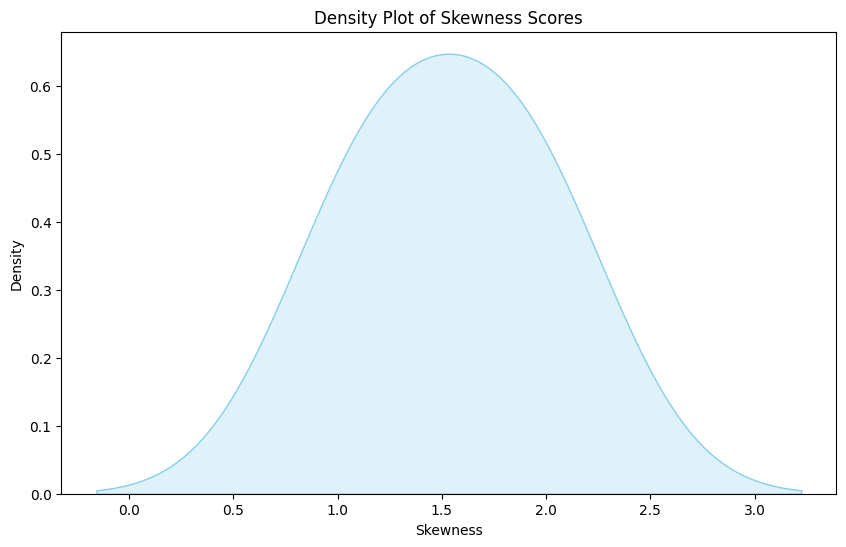

The Pierson's second skewness score of NASA Dataset distribution is:
- B1X_skew: 1.17347
- B1Y_skew: 1.89348


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
column_names = ['B1X_skew', 'B1Y_skew']

mean_price = New_NASA_Dataset[column_names].mean()
median_price = New_NASA_Dataset[column_names].median()
std = New_NASA_Dataset[column_names].std()

skewness = (3 * (mean_price - median_price)) / std

# Combine skewness values into a single array
skewness_values = skewness.values

# Plot skewness scores as a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(skewness_values, color='skyblue', fill=True)
plt.title("Density Plot of Skewness Scores")
plt.xlabel("Skewness")
plt.ylabel("Density")
plt.show()

# Print the skewness score
print("The Pierson's second skewness score of NASA Dataset distribution is:")
for col, skew in skewness.items():
    print(f"- {col}: {skew:.5f}")